# Data exploration and ingestion of external annotations

### Library loading

In [1]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd
from scipy import sparse
from anndata import AnnData
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.0 anndata==0.7.6 umap==0.4.6 numpy==1.18.5 scipy==1.6.1 pandas==1.2.2 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [3]:
data_folder = "../../data"
result_folder = '../../Result'
graph_folder = '../../Graph'

### Clustering Integrated Dataset

In [4]:
adata = sc.read(os.path.join(data_folder, "complete-gex-dataset-annotated.h5ad"))
adata

AnnData object with n_obs × n_vars = 143428 × 15935
    obs: 'n_genes', 'sample_tag', 'patient', 'time', 'lab_id', 'DOB', 'sex', 'ht', 'VES', 'PCR', 'FIBRINOGENO', 'ANTITROMB', 'sCD40L', 'EGF', 'Eotaxin', 'FGF-2', 'FLT-3L', 'Fractalkine', 'G-CSF', 'GM-CSF', 'GROalpha', 'IFNalpha2', 'IFNgamma', 'IL-1alpha', 'IL-1beta', 'IL-1RA', 'IL-2', 'IL-3', 'IL-4', 'IL-5', 'IL-6', 'IL-7', 'IL-8', 'IL-9', 'IL-10', 'IL-12p40', 'IL-12p70', 'IL-13', 'IL-15', 'IL-17A', 'IL-17E/IL-25', 'IL-17F', 'IL-18', 'IL-22', 'IL-27', 'IP-10', 'MCP-1', 'MCP-3', 'M-CSF', 'MDC', 'MIG', 'MIP-1alpha', 'MIP-1beta', 'PDGF-AA', 'PDGF-AB/BB', 'TGFalpha', 'TNFalpha', 'TNFbeta', 'VEGF-A', 'IgA', 'IgG', 'days_from_symptoms_to_admission', 'severity', 'age', 'alcohol', 'smoke', 'fever', 'cough', 'pneumo', 'oxygen', 'comorbities', 'hypertension', 'batch_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'total_counts_ab', 'pct_counts_ab', 'leiden', 'leiden_abseq_harmony

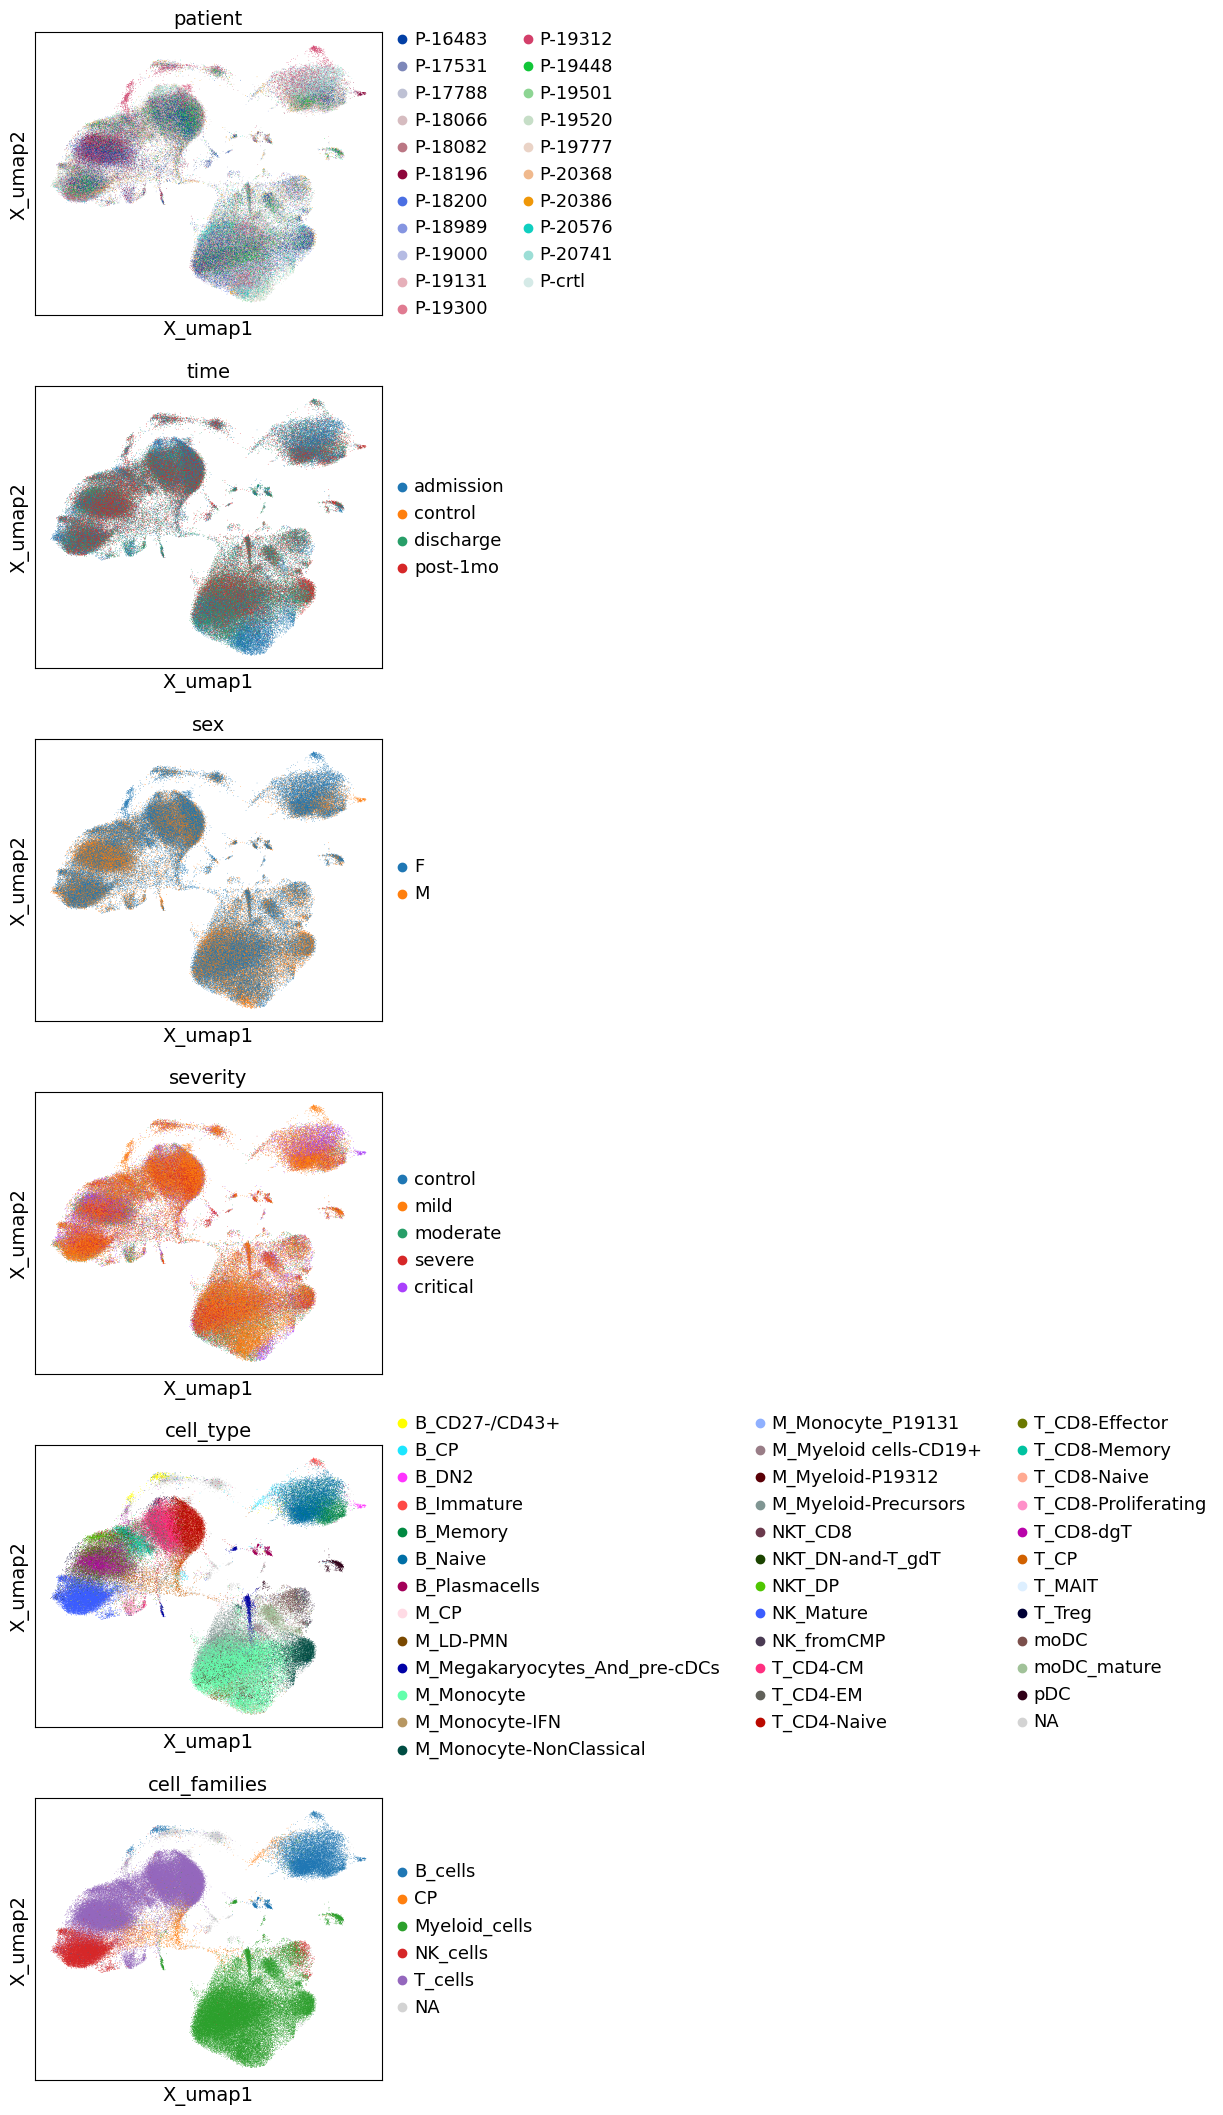

In [5]:
sc.pl.embedding(adata, "X_umap" ,color=["patient","time","sex","severity","cell_type","cell_families"],ncols=1)

## Check with External Dataset

## PBMC Nature Medicine

https://www.nature.com/articles/s41591-020-0944-y

In [6]:
ExtRefAnnData = sc.read_h5ad(os.path.join(data_folder, "blish.h5ad"))

In [7]:
ExtRefAnnData 

AnnData object with n_obs × n_vars = 44721 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rrna', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'singler', 'Admission.level', 'cell.type.fine', 'cell.type.coarse', 'cell.type', 'IFN1', 'HLA1', 'Donor.orig', 'Donor.full', 'Donor', 'Status', 'Sex', 'DPS', 'DTF', 'Admission', 'Ventilated'
    var: 'sct.detection_rate', 'sct.gmean', 'sct.variance', 'sct.residual_mean', 'sct.residual_variance', 'sct.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

... storing 'singler' as categorical
... storing 'Admission.level' as categorical
... storing 'cell.type.fine' as categorical
... storing 'cell.type.coarse' as categorical
... storing 'cell.type' as categorical
... storing 'Donor.orig' as categorical
... storing 'Donor.full' as categorical
... storing 'Donor' as categorical
... storing 'Status' as categorical
... storing 'Sex' as categorical
... storing 'Admission' as categorical
... storing 'Ventilated' as categorical


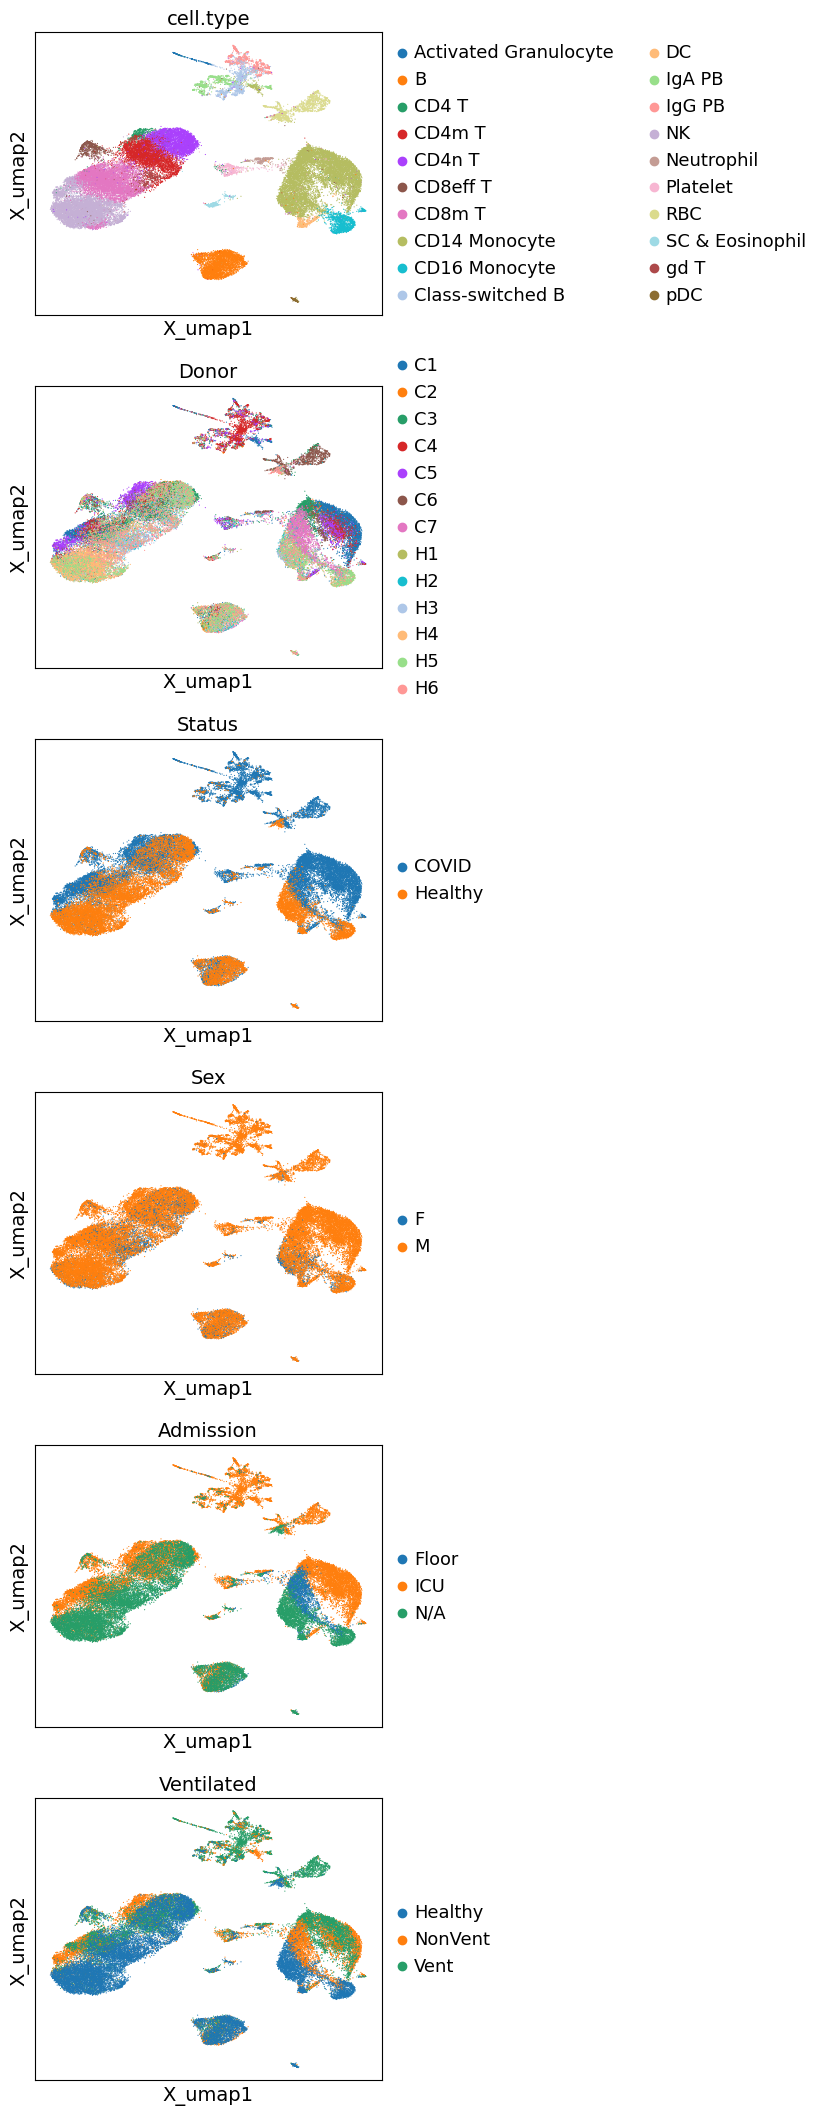

In [8]:
sc.pl.embedding(ExtRefAnnData, "X_umap" ,color=["cell.type","Donor","Status", "Sex", "Admission","Ventilated"],ncols=1)

In [9]:
adataIngestion = adata.copy()

computing PCA
    with n_comps=50
    finished (0:00:16)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:26)


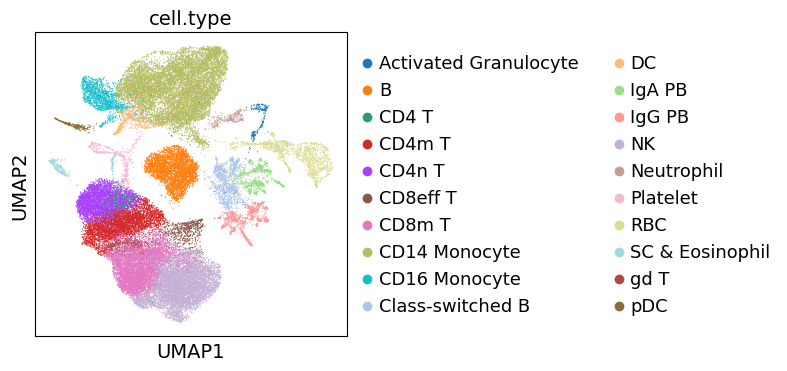

In [10]:
sc.pp.pca(ExtRefAnnData)
sc.pp.neighbors(ExtRefAnnData)
sc.tl.umap(ExtRefAnnData)
sc.pl.umap(ExtRefAnnData, color='cell.type')

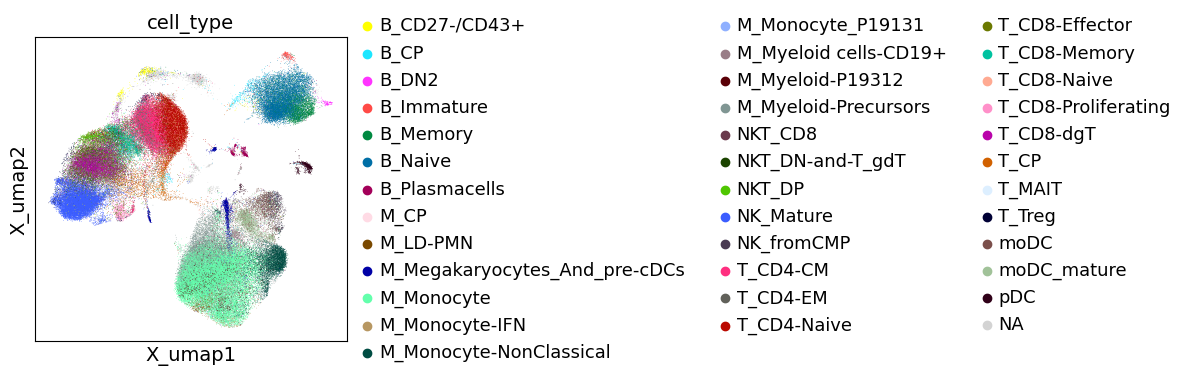

In [11]:
sc.pl.embedding(adata, "X_umap" ,color=["cell_type"],ncols=1)

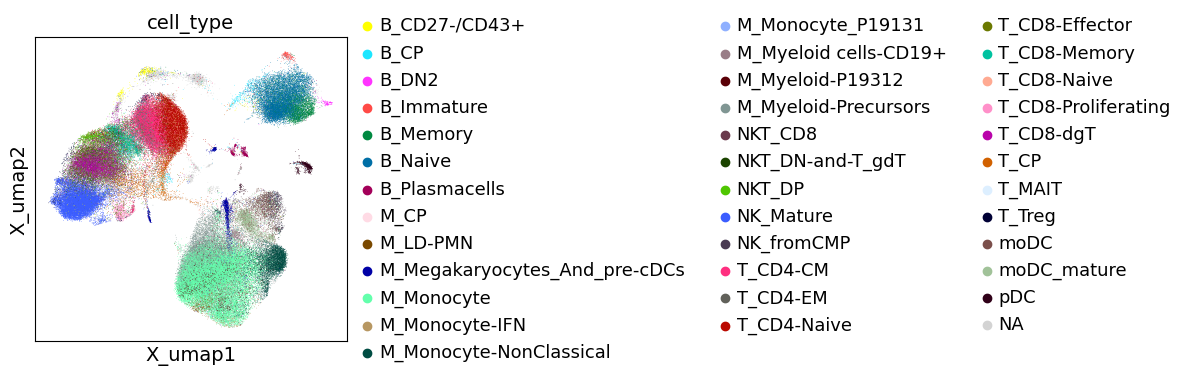

In [12]:
sc.pl.embedding(adata, "X_umap" ,color=["cell_type"],ncols=1)

In [13]:
var_names = ExtRefAnnData.var_names.intersection(adataIngestion.var_names)
ExtRefAnnData = ExtRefAnnData[:, var_names]
adataIngestion = adataIngestion[:, var_names]

### Ingestion

In [14]:
sc.tl.ingest(adataIngestion, ExtRefAnnData, obs='cell.type') 

running ingest
    finished (0:01:27)


### Re-Label 

In [15]:
adata.obs["External_Annotation"] = adataIngestion.obs.loc[adata.obs.index, "cell.type"]

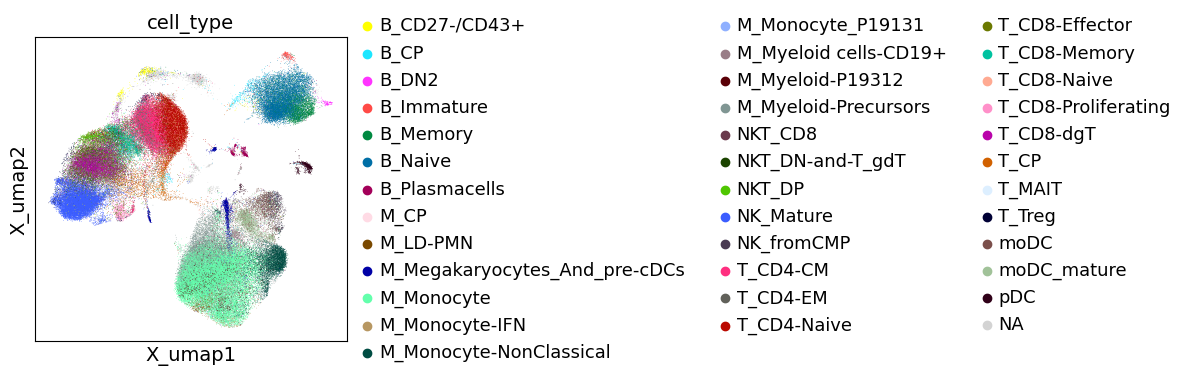

In [16]:
sc.pl.embedding(adata, "X_umap" ,color=["cell_type"])

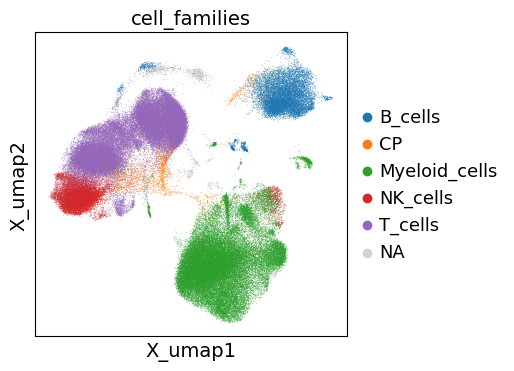

In [17]:
sc.pl.embedding(adata, "X_umap" ,color=["cell_families"])

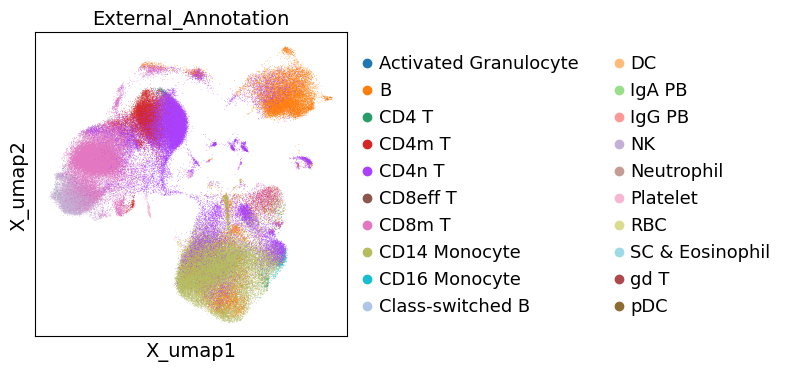

In [18]:
sc.pl.embedding(adata, "X_umap" ,color=["External_Annotation"])